# Blackjack Solution through a bang-bang adjustment approach

In [172]:
from BlackjackEnv import BlackjackEnv
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [173]:
# Initial threshold value for training
init_threshold: int = 20
n_games_per_episode: int = 5_000
n_episodes: int = 100
n_turns_per_episode: int = 3

Calculate the reward given a hand sum

In [174]:
def reward(ending_val) -> float:
    if ending_val > 21:
        return 0
    return (ending_val / 21) ** 7

Train the threshold given on `n_games_per_episode` to average the reward from this threshold

In [175]:
def train_episode(threshold) -> float:
    total_reward = 0
    for i in range(n_games_per_episode):
        env = BlackjackEnv(2)

        for _ in range(n_turns_per_episode):
            if env.hands[0] < threshold:
                env.add_card(0)
        if random.randrange(0, 1):
            env.add_card(1)

        reward_gained = reward(env.hands[0])
        if reward(env.hands[1]) < reward_gained:
            total_reward += reward_gained
    return total_reward / n_games_per_episode

Given a threshold to start at, optimize the threshold using bang-bang control

In [176]:
def optimize_threshold(threshold=init_threshold) -> [int, list, list]:
    reward_over_time = []
    threshold_over_time = []
    for i in tqdm(range(n_episodes)):
        reward_over_time.append(train_episode(threshold))
        threshold_over_time.append(threshold)

        if i < 1:
            threshold -= 1
            continue

        gradient = (reward_over_time[-1] - reward_over_time[-2]) / 2

        if gradient > 0:
            threshold -= 1
        elif gradient < 0:
            threshold += 1
    return threshold, reward_over_time, threshold_over_time

Train the optimizer and get the resultant data

In [177]:
resultant_threshold, rewards, thresholds = optimize_threshold()
print(f"Final threshold: {resultant_threshold}")

100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


Plot the data on the same graph

Final threshold: 20


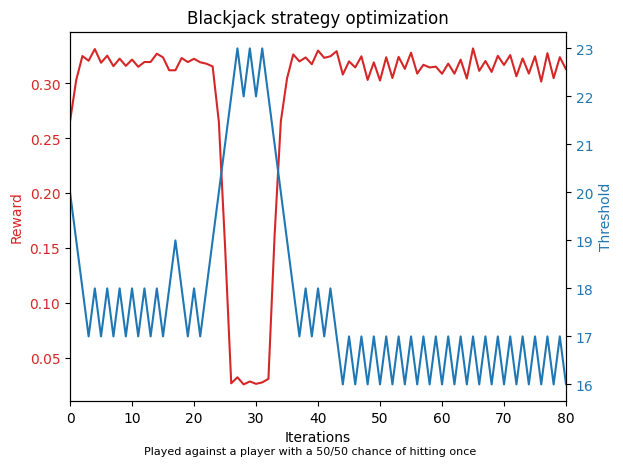

In [181]:
fig, ax1 = plt.subplots()

ax1.set_xlim(0, 80)
ax1.set_xlabel("Iterations")
ax1.set_ylabel('Reward', color='tab:red')
ax1.plot(rewards, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()
ax2.set_ylabel("Threshold", color="tab:blue")
ax2.plot(thresholds, color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")
plt.title("Blackjack strategy optimization")
plt.figtext(0.5, 0, "Played against a player with a 50/50 chance of hitting once", wrap=True, horizontalalignment='center', fontsize=8)

plt.show()